# Лабораторная работа 1. Предобработка данных.

## Reading of data and creating variational series

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [6]:
path_to_data = "data.xlsx"
df = pd.read_excel(path_to_data)
df.head()

,reading score,writing score
0,96,100
1,54,49
2,93,91
3,61,57
4,73,70


In [7]:
writing_score = df['writing score'].copy()
writing_score.head()

0    100
1     49
2     91
3     57
4     70
Name: writing score, dtype: int64

In [8]:
reading_score = df['reading score'].copy()
reading_score.head()

0    96
1    54
2    93
3    61
4    73
Name: reading score, dtype: int64

In [9]:
writing_score.sort_values(inplace=True)
writing_score.reset_index(inplace=True, drop=True)
writing_score.head()

0    21
1    28
2    31
3    32
4    35
Name: writing score, dtype: int64

In [10]:
reading_score.sort_values(inplace=True)
reading_score.reset_index(inplace=True, drop=True)
reading_score.head()

0    25
1    31
2    35
3    35
4    37
Name: reading score, dtype: int64

## Сreating table of interval variational series for wriritng score

In [11]:
writing_min = writing_score.min()
writing_max = writing_score.max()
writing_elements_count = writing_score.count()
writing_range = writing_max - writing_min 
writing_intervals_count = 15
writing_len_interval = writing_range / writing_intervals_count

In [12]:
writing_a = [writing_min + i*writing_len_interval for i in range(writing_intervals_count + 1)]
#a = pd.interval_range(writing_min, writing_max, len_interval)
#a[0] -= 0.0001 # need to substruct a small number to include first value
writing_a

[21.0,
 26.266666666666666,
 31.53333333333333,
 36.8,
 42.06666666666666,
 47.33333333333333,
 52.6,
 57.86666666666667,
 63.13333333333333,
 68.4,
 73.66666666666666,
 78.93333333333334,
 84.2,
 89.46666666666667,
 94.73333333333333,
 100.0]

In [13]:
writing_indicates = writing_score.groupby(pd.cut(writing_score, writing_a, include_lowest=True)).count()
writing_indicates.name = 'indicates'
writing_frequency = writing_indicates / writing_elements_count
writing_frequency.name = 'frequency'
writing_frequency

writing score
(20.999, 26.267]    0.005
(26.267, 31.533]    0.010
(31.533, 36.8]      0.010
(36.8, 42.067]      0.035
(42.067, 47.333]    0.055
(47.333, 52.6]      0.085
(52.6, 57.867]      0.055
(57.867, 63.133]    0.130
(63.133, 68.4]      0.130
(68.4, 73.667]      0.140
(73.667, 78.933]    0.120
(78.933, 84.2]      0.080
(84.2, 89.467]      0.080
(89.467, 94.733]    0.030
(94.733, 100.0]     0.035
Name: frequency, dtype: float64

In [14]:
writing_hist = writing_frequency / writing_len_interval
writing_hist.name = "hist"
writing_hist

writing score
(20.999, 26.267]    0.000949
(26.267, 31.533]    0.001899
(31.533, 36.8]      0.001899
(36.8, 42.067]      0.006646
(42.067, 47.333]    0.010443
(47.333, 52.6]      0.016139
(52.6, 57.867]      0.010443
(57.867, 63.133]    0.024684
(63.133, 68.4]      0.024684
(68.4, 73.667]      0.026582
(73.667, 78.933]    0.022785
(78.933, 84.2]      0.015190
(84.2, 89.467]      0.015190
(89.467, 94.733]    0.005696
(94.733, 100.0]     0.006646
Name: hist, dtype: float64

In [15]:
writing_points = [(writing_a[i] + writing_a[i + 1]) / 2 for i in range(writing_intervals_count)]
writing_points

[23.633333333333333,
 28.9,
 34.166666666666664,
 39.43333333333333,
 44.699999999999996,
 49.96666666666667,
 55.233333333333334,
 60.5,
 65.76666666666667,
 71.03333333333333,
 76.3,
 81.56666666666666,
 86.83333333333334,
 92.1,
 97.36666666666667]

In [16]:
writing_F = writing_frequency.cumsum()
writing_F.name = 'F'
writing_F

writing score
(20.999, 26.267]    0.005
(26.267, 31.533]    0.015
(31.533, 36.8]      0.025
(36.8, 42.067]      0.060
(42.067, 47.333]    0.115
(47.333, 52.6]      0.200
(52.6, 57.867]      0.255
(57.867, 63.133]    0.385
(63.133, 68.4]      0.515
(68.4, 73.667]      0.655
(73.667, 78.933]    0.775
(78.933, 84.2]      0.855
(84.2, 89.467]      0.935
(89.467, 94.733]    0.965
(94.733, 100.0]     1.000
Name: F, dtype: float64

In [17]:
expect_writing_score = writing_points * writing_frequency
expect_writing_score.name = "expect"
expect_writing_score

writing score
(20.999, 26.267]    0.118167
(26.267, 31.533]    0.289000
(31.533, 36.8]      0.341667
(36.8, 42.067]      1.380167
(42.067, 47.333]    2.458500
(47.333, 52.6]      4.247167
(52.6, 57.867]      3.037833
(57.867, 63.133]    7.865000
(63.133, 68.4]      8.549667
(68.4, 73.667]      9.944667
(73.667, 78.933]    9.156000
(78.933, 84.2]      6.525333
(84.2, 89.467]      6.946667
(89.467, 94.733]    2.763000
(94.733, 100.0]     3.407833
Name: expect, dtype: float64

In [18]:
expect_square_writing_score = (writing_points * writing_frequency) * writing_points
expect_square_writing_score.name = 'expect_square'
expect_square_writing_score

writing score
(20.999, 26.267]      2.792672
(26.267, 31.533]      8.352100
(31.533, 36.8]       11.673611
(36.8, 42.067]       54.424572
(42.067, 47.333]    109.894950
(47.333, 52.6]      212.216761
(52.6, 57.867]      167.789661
(57.867, 63.133]    475.832500
(63.133, 68.4]      562.283078
(68.4, 73.667]      706.402822
(73.667, 78.933]    698.602800
(78.933, 84.2]      532.249689
(84.2, 89.467]      603.202222
(89.467, 94.733]    254.472300
(94.733, 100.0]     331.809372
Name: expect_square, dtype: float64

## Сreating table of interval variational series for reading score

In [19]:
reading_min = reading_score.min()
reading_max = reading_score.max()
reading_elements_count = reading_score.count()
reading_range = reading_max - reading_min 
reading_intervals_count = 10
reading_len_interval = reading_range / reading_intervals_count
reading_score.max()

100

In [20]:
reading_a = [reading_min + i*reading_len_interval for i in range(reading_intervals_count + 1)]

In [21]:
reading_indicates = reading_score.groupby(pd.cut(reading_score, reading_a, include_lowest=True)).count()
reading_indicates.name = 'indicates'
reading_frequency = reading_indicates / reading_elements_count
reading_frequency.name = 'frequency'

In [22]:
reading_hist = reading_frequency / reading_len_interval
reading_hist.name = "hist"

In [23]:
reading_points = [(reading_a[i] + reading_a[i + 1]) / 2 for i in range(reading_intervals_count)]

In [24]:
reading_F = reading_frequency.cumsum()
reading_F.name = 'F'

In [25]:
expect_reading_score = reading_points * reading_frequency
expect_reading_score.name = "expect"

In [26]:
expect_square_reading_score = (reading_points * reading_frequency) * reading_points
expect_square_reading_score.name = 'expect_square'

## Visualization for writing score

15

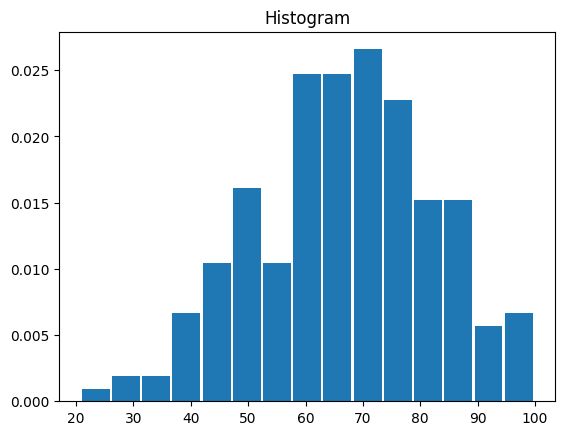

In [27]:
fig, ax = plt.subplots()
ax.bar(writing_a[:writing_intervals_count], writing_hist.values, width=writing_len_interval-0.4, align='edge')
ax.set_title('Histogram')
len(writing_a[:writing_intervals_count])

Text(0.5, 1.0, 'Frequency polygon')

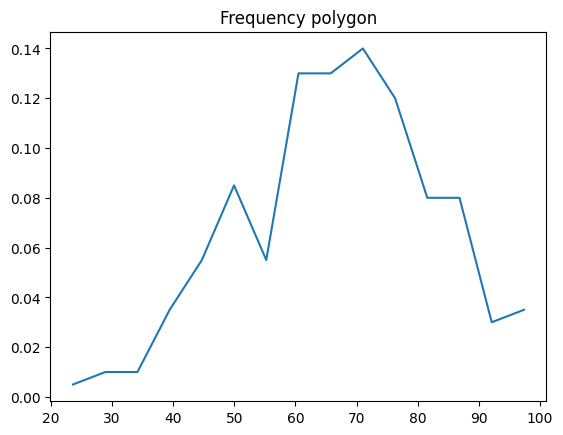

In [28]:
fig, ax = plt.subplots()
ax.plot(writing_points, writing_frequency)
ax.set_title('Frequency polygon')

Text(0.5, 1.0, 'Sample distribution function')

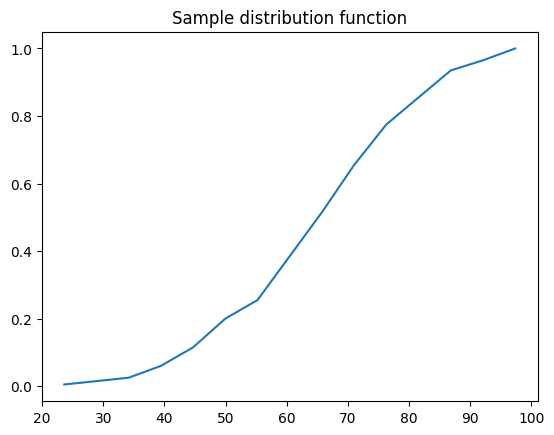

In [29]:
fig, ax = plt.subplots()
ax.plot(writing_points, writing_F.values)
ax.set_title('Sample distribution function')

## Visualization for reading score

10

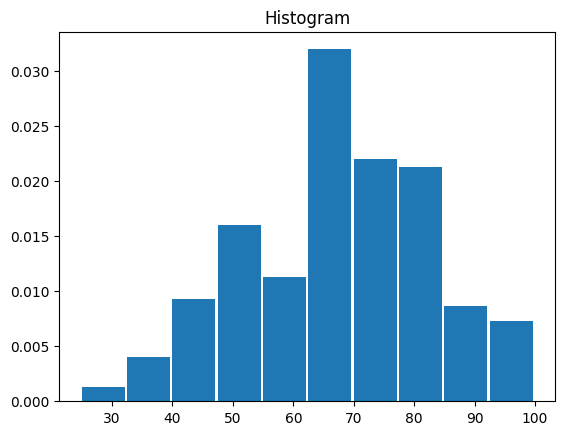

In [30]:
fig, ax = plt.subplots()
ax.bar(reading_a[:reading_intervals_count], reading_hist.values, width=reading_len_interval-0.4, align='edge')
ax.set_title('Histogram')
len(writing_a[:reading_intervals_count])

Text(0.5, 1.0, 'Frequency polygon')

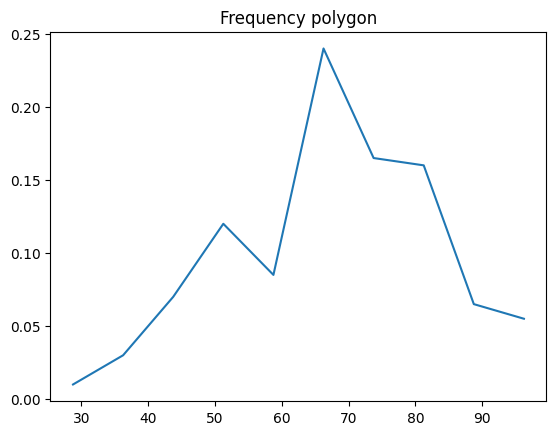

In [31]:
fig, ax = plt.subplots()
ax.plot(reading_points, reading_frequency)
ax.set_title('Frequency polygon')

Text(0.5, 1.0, 'Sample distribution function')

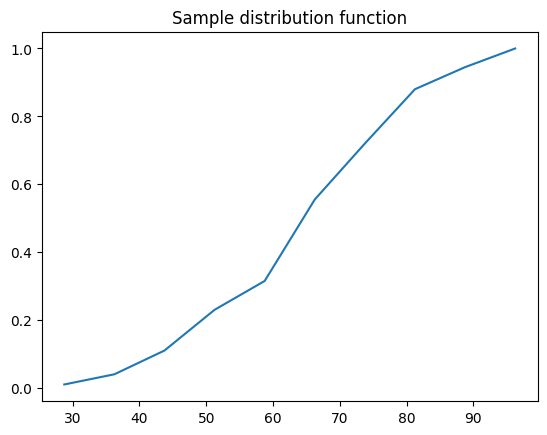

In [32]:
fig, ax = plt.subplots()
ax.plot(reading_points, reading_F.values)
ax.set_title('Sample distribution function')

## Calculation of sample statistic for writing score

### Expectation

In [33]:
writing_sample_expect = sum(expect_writing_score)
writing_sample_expect

67.03066666666666

In [34]:
inner_writing_sample_expect = writing_score.mean()
inner_writing_sample_expect

67.075

### Variance

In [35]:
writing_sample_var = sum(expect_square_writing_score) - (sum(expect_writing_score)) ** 2
writing_sample_var

238.88883733333387

In [36]:
inner_writing_sample_var = (writing_elements_count-1)/writing_elements_count*writing_score.var()
inner_writing_sample_var 

241.969375

### Unbiased variance 

In [37]:
writing_sample_var_unb = writing_elements_count/(writing_elements_count-1)*writing_sample_var
writing_sample_var_unb

240.08928375209433

In [38]:
inner_writing_sample_var_unb = writing_score.var()
inner_writing_sample_var_unb

243.1853015075377

### Mode

In [39]:
writing_mode = writing_points[np.argmax(writing_frequency)]
writing_mode

71.03333333333333

In [40]:
inner_writing_mode = writing_score.mode().values[0]
inner_writing_mode

69

### Median

In [41]:
if len(writing_points) % 2 == 0:
    writing_median = (writing_points[len(writing_points) // 2] + writing_points[len(writing_points) // 2 - 1]) / 2
else:
    writing_median = (writing_points[len(writing_points) // 2])
writing_median

60.5

In [42]:
inner_writing_median = writing_score.median()
inner_writing_median

68.0

### Standart deviation

In [43]:
writing_std = sqrt(writing_sample_var_unb)
writing_std

15.49481473758542

In [44]:
inner_writing_std = writing_score.std()
inner_writing_std

15.59439968410255

## Calculation of sample statistic for readin score

### Expectation

In [42]:
reading_sample_expect = sum(expect_reading_score)
reading_sample_expect

67.71249999999999

In [43]:
inner_reading_sample_expect = reading_score.mean()
inner_reading_sample_expect

67.96

### Variance

In [44]:
reading_sample_var = sum(expect_square_reading_score) - (sum(expect_reading_score)) ** 2
reading_sample_var

233.8298437500016

In [45]:
inner_reading_sample_var = (reading_elements_count-1)/reading_elements_count*reading_score.var()
inner_reading_sample_var 

232.2384

### Unbiased variance 

In [46]:
reading_sample_var_unb = reading_elements_count/(reading_elements_count-1)*reading_sample_var
reading_sample_var_unb

235.00486809045384

In [47]:
inner_reading_sample_var_unb = reading_score.var()
inner_reading_sample_var_unb

233.4054271356784

### Mode

In [48]:
reading_mode = reading_points[np.argmax(reading_frequency)]
reading_mode

66.25

In [49]:
inner_reading_mode = reading_score.mode().values[0]
inner_reading_mode

70

### Median

In [50]:
if len(reading_points) % 2 == 0:
    reading_median = (reading_points[len(reading_points) // 2] + reading_points[len(reading_points) // 2 - 1]) / 2
else:
    reading_median = (reading_points[len(reading_points) // 2])
reading_median

62.5

In [51]:
inner_reading_median = reading_score.median()
inner_reading_median

70.0

### Standart deviation

In [52]:
from math import sqrt
reading_std = sqrt(reading_sample_var_unb)
reading_std

15.32986849553687

In [53]:
inner_reading_std = reading_score.std()
inner_reading_std

15.277611957883941

## Conclusion

1) Раcпределения writing_score и reading_score схожи с нормальным распределением.
2) Различие выборочных статистик, расчитанных на основе интервальных рядов и на основе встроенных в python методов, уменьшается при увеличении количества интервалов.
3) При количестве интервалов равном 10 в reading_score самое большое различие из всех статистик у медианы, разница составляет 12%.